In [8]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, linear_model, model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.stats import chi2_contingency



In [9]:
# Read the CSV file
url = 'https://raw.githubusercontent.com/iatecookies/BachelorThesis/main/survey.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

# PREPROCESSING

# Remove the first two rows
df = df.iloc[3:]

# index of dataframe represents a start date. Replaced with sequantial numeric index
df.reset_index(drop=True, inplace=True)

df.head()


print(df.info())
# data_types = df.dtypes
# print(data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 39 columns):
EndDate                  30 non-null object
Status                   30 non-null object
IPAddress                30 non-null object
Progress                 30 non-null object
Duration (in seconds)    30 non-null object
Finished                 30 non-null object
RecordedDate             30 non-null object
ResponseId               30 non-null object
RecipientLastName        0 non-null object
RecipientFirstName       0 non-null object
RecipientEmail           0 non-null object
ExternalReference        0 non-null object
LocationLatitude         30 non-null object
LocationLongitude        30 non-null object
DistributionChannel      30 non-null object
UserLanguage             30 non-null object
Q1                       30 non-null object
Q2                       30 non-null object
Q3                       30 non-null object
Q4                       30 non-null object
Q5                   

In [40]:
# Only question 1

# df_question1 = df.iloc[:, 16: 17]

# # Create a new dataset with Factor1, Factor2, Factor3, and Target Question (Q1)
# new_dataset = pd.DataFrame(columns=['Factor1', 'Factor2', 'Factor3', 'Target_Question'])

# # new dataset starts as object with datatype per default
# new_dataset['Factor1'] = new_dataset['Factor1'].astype(int)
# new_dataset['Factor2'] = new_dataset['Factor2'].astype(int)
# new_dataset['Factor3'] = new_dataset['Factor3'].astype(int)
# new_dataset['Target_Question'] = new_dataset['Target_Question'].astype(int)

# # Iterate over each row in the original dataset
# for index, row in df_question1.iterrows():
    
#     if row.item() == 'Scenario 1':

#         #Map scenario A to 0 and scenario B to 1
#         new_row = {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0}
#     else:
#         new_row = {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}
#     new_dataset = new_dataset.append(new_row, ignore_index=True)
    
#print(new_dataset)

#print(new_dataset.info())


In [210]:
# Only question 1

# X = new_dataset[['Factor1', 'Factor2', 'Factor3']]
# y = new_dataset['Target_Question']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the multinomial logistic regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Predict the target variable for the test data
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = model.score(X_test, y_test)
# print("Accuracy:", accuracy)

In [3]:
# Now for all the questions

scenario_rows = {
    1: {'Scenario 1': {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    2: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 1, 'Factor3': 1, 'Target_Question': 1}},
    3: {'Scenario 1': {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 1, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    4: {'Scenario 1': {'Factor1': 0, 'Factor2': 1, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    5: {'Scenario 1': {'Factor1': 1, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    6: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    7: {'Scenario 1': {'Factor1': 1, 'Factor2': 1, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    8: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 1}},
    9: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 1, 'Target_Question': 1}},
    10: {'Scenario 1': {'Factor1': 1, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    11: {'Scenario 1': {'Factor1': 1, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 1, 'Target_Question': 1}},
    12: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 1, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    13: {'Scenario 1': {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    14: {'Scenario 1': {'Factor1': 1, 'Factor2': 1, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
}


for i in range (1, 15):
    
    try: 
        
        df_question = df.iloc[:, 15+i: 16+i]
        print("Question", i )
        #print(df_question)

        # Create a new dataset with Factor1, Factor2, Factor3, and Target Question (Q1)
        new_dataset = pd.DataFrame(columns=['Factor1', 'Factor2', 'Factor3', 'Target_Question'])

        # new dataset starts as object with datatype per default
        new_dataset['Factor1'] = new_dataset['Factor1'].astype(int)
        new_dataset['Factor2'] = new_dataset['Factor2'].astype(int)
        new_dataset['Factor3'] = new_dataset['Factor3'].astype(int)
        new_dataset['Target_Question'] = new_dataset['Target_Question'].astype(int)


        # Iterate over each row in the original dataset
        for index, row in df_question.iterrows():

            scenario = row.item()

            new_row = scenario_rows[i][scenario]

            new_dataset = new_dataset.append(new_row, ignore_index=True)
            

        #print(new_dataset)
        
        X = new_dataset[['Factor1', 'Factor2', 'Factor3']]
        y = new_dataset['Target_Question']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize the multinomial logistic regression model
        model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predict the target variable for the test data
        y_pred = model.predict(X_test)
        

        # Evaluate the model
        accuracy = model.score(X_test, y_test)
        print("Mean accuracy:", accuracy)
        #accuracies.append(accuracy)
        
        prob = model.predict_proba(X_test)
        print("Mean predicted probabilities of each class of the target variable:", np.mean(prob, axis= 0))
        print("Standard deviation:", np.std(prob, axis= 0))
        
        print()
        
        #Compare the predicted labels to the true labels and use one of the measures to quantify how well the model is doing.
        print(sklearn.metrics.classification_report(y_test, y_pred))
        print(pd.crosstab(y_test, y_pred, rownames=['ACTUAL'], colnames=['PREDICTED'], margins=True))
        
        print()
        print()
    except ValueError as err:
        print(err)

Question 1
Mean accuracy: 1.0
Mean predicted probabilities of each class of the target variable: [0.9637486 0.0362514]
Standard deviation: [0. 0.]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

PREDICTED  0  All
ACTUAL           
0          6    6
All        6    6


Question 2
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
Question 3
Mean accuracy: 1.0
Mean predicted probabilities of each class of the target variable: [0.95462742 0.04537258]
Standard deviation: [1.11022302e-16 0.00000000e+00]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
w


## Chi-squared  test


use chi-squared test to analyze whether changes in factor(s) have a significant impact on participants’ choice



In [163]:
# Read the CSV file
url = 'https://raw.githubusercontent.com/iatecookies/BachelorThesis/main/survey.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

# PREPROCESSING

# Remove the first two rows
df = df.iloc[3:]

# index of dataframe represents a start date. Replaced with sequantial numeric index
df.reset_index(drop=True, inplace=True)

df.head()

data_types = df.dtypes
#print(data_types)

In [164]:
for i in range (16, 30):
    for j in range(16, 30):

        if (i != j):
            
            column_name = df.columns[i]
            column_name2 = df.columns[j]
            print(column_name, column_name2)
            
            # Convert columns to 'category' data type
            df[column_name] = df[column_name].astype('category')
            df[column_name2] = df[column_name2].astype('category')
            
    
            #Step 4: Perform the chi-squared test
            contingency_table = pd.crosstab(df.iloc[:,i],df.iloc[:,j] )
            
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            

            # Interpret the results
            print("Chi-squared test statistics:", chi2)
            
            alpha = 0.05
            
            print("P-value:", p_value)
            
            if p_value <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (H0 holds true)')
            print("Degrees of freedom:", dof)
            print()
            print()

Q1 Q2
Chi-squared test statistics: 6.991676575505352
P-value: 0.008188961276439782
Dependent (reject H0)
Degrees of freedom: 1


Q1 Q3
Chi-squared test statistics: 1.8390804597701151
P-value: 0.17505876122872865
Independent (H0 holds true)
Degrees of freedom: 1


Q1 Q4
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q1 Q5
Chi-squared test statistics: 6.991676575505352
P-value: 0.008188961276439782
Dependent (reject H0)
Degrees of freedom: 1


Q1 Q6
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q1 Q7
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q1 Q8
Chi-squared test statistics: 0.28800940438871475
P-value: 0.5914989835663509
Independent (H0 holds true)
Degrees of freedom: 1


Q1 Q9
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q1 Q10
Chi-squared test statistics: 0.0
P-value: 1.0
Ind

Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q7 Q9
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q7 Q10
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q7 Q11
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q7 Q12
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q7 Q13
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q7 Q14
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q8 Q1
Chi-squared test statistics: 0.2880094043887148
P-value: 0.5914989835663509
Independent (H0 holds true)
Degrees of freedom: 1


Q8 Q2
Chi-squared test statistics: 0.2880094043887148
P-value: 0.5914989835663509
Independent (H0 holds true)
Degrees of freedom: 1


Q8 Q3

Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q13 Q11
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q13 Q12
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q13 Q14
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q14 Q1
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q14 Q2
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q14 Q3
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q14 Q4
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q14 Q5
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q14 Q6
Chi-squared test statistics: 0.0
P-value: 1.0
Indepe

## Correlation analysis

use correlation analysis to analyze whether age/gender/education level/… is correlated with participant choice in a certain condition

In [193]:
# Read the CSV file
url = 'https://raw.githubusercontent.com/iatecookies/BachelorThesis/main/survey.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

# PREPROCESSING

# Remove the first two rows
df = df.iloc[3:]

# index of dataframe represents a start date. Replaced with sequantial numeric index
df.reset_index(drop=True, inplace=True)

df.head()

data_types = df.dtypes
#print(data_types)

In [194]:

columns_q1_to_q14 = df.iloc[:, 16:30]

#print(columns_q1_to_q14)

# Replace "Scenario 1" with 0 and "Scenario 2" with 1
columns_q1_to_q14_encoded = columns_q1_to_q14.replace({"Scenario 1": 0, "Scenario 2": 1})

# print(columns_q1_to_q14_encoded)
# print(columns_q1_to_q14_encoded.iloc[ :, 6:7].dtypes) example check if Q7 is actually num

# Map gender categories to numerical values
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}  # Update with your gender categories if needed
df['Q15'] = df['Q15'].map(gender_mapping)

# Map age categories to numerical ranges
age_mapping = {'18-24 years old': 1, '25-34 years old': 2, '35-44 years old': 3, '45-54 years old': 4, '55-64 years old': 5, '65+ years old': 6}  
df['Q16'] = df['Q16'].map(age_mapping)

# Map education categories to numerical ranges
education_mapping = {"High school diploma or equivalent": 1, "Associate's degree or vocational certification": 2, "Bachelor's degree": 3, "Master's degree": 4, "Doctorate or professional degree": 5}  
df['Q19'] = df['Q19'].map(education_mapping)

# Calculate the correlations between age/gender/education and Q1 to Q14 using Spearman's rank correlation coefficient
correlations = pd.concat([columns_q1_to_q14_encoded, df['Q16'], df['Q15'], df['Q19']], axis=1).corr(method='spearman')

#print(correlations)
print()
print()

# Display the correlation matrix
print(correlations.loc['Q1':'Q14', ['Q16', 'Q15', 'Q19']])



          Q16       Q15       Q19
Q1  -0.193557 -0.173702 -0.266279
Q2  -0.318800 -0.198517  0.138928
Q3   0.027251 -0.311805  0.069273
Q4        NaN       NaN       NaN
Q5  -0.193557 -0.173702 -0.266279
Q6        NaN       NaN       NaN
Q7        NaN       NaN       NaN
Q8   0.004622  0.110801  0.249074
Q9        NaN       NaN       NaN
Q10       NaN       NaN       NaN
Q11 -0.169477 -0.174964 -0.036280
Q12       NaN       NaN       NaN
Q13       NaN       NaN       NaN
Q14       NaN       NaN       NaN


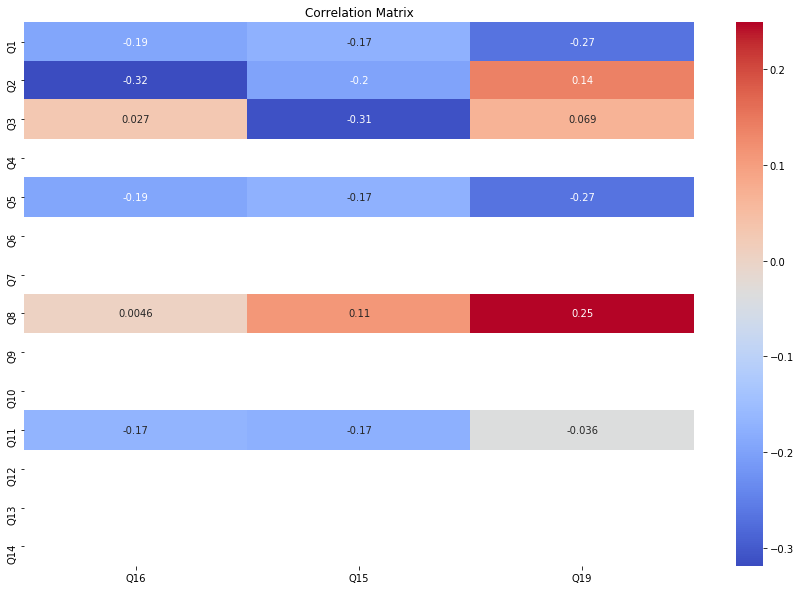

In [192]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlations.loc['Q1':'Q14', ['Q16', 'Q15', 'Q19']], annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

## Basic social demographic plots


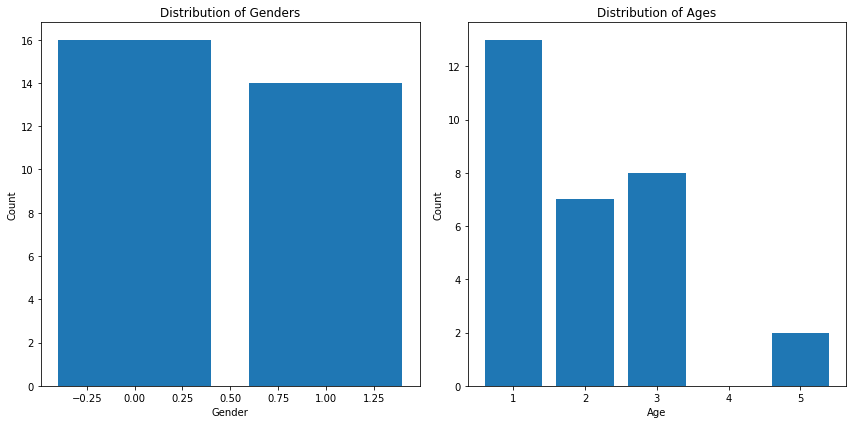

In [197]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figure size if needed


# Plot 1: Gender Distribution
gender_counts = df['Q15'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Genders')



# Plot 2: Age Distribution
age_counts = df['Q16'].value_counts()
axes[1].bar(age_counts.index, age_counts.values)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Ages')


plt.tight_layout()

# Show the plot
plt.show()

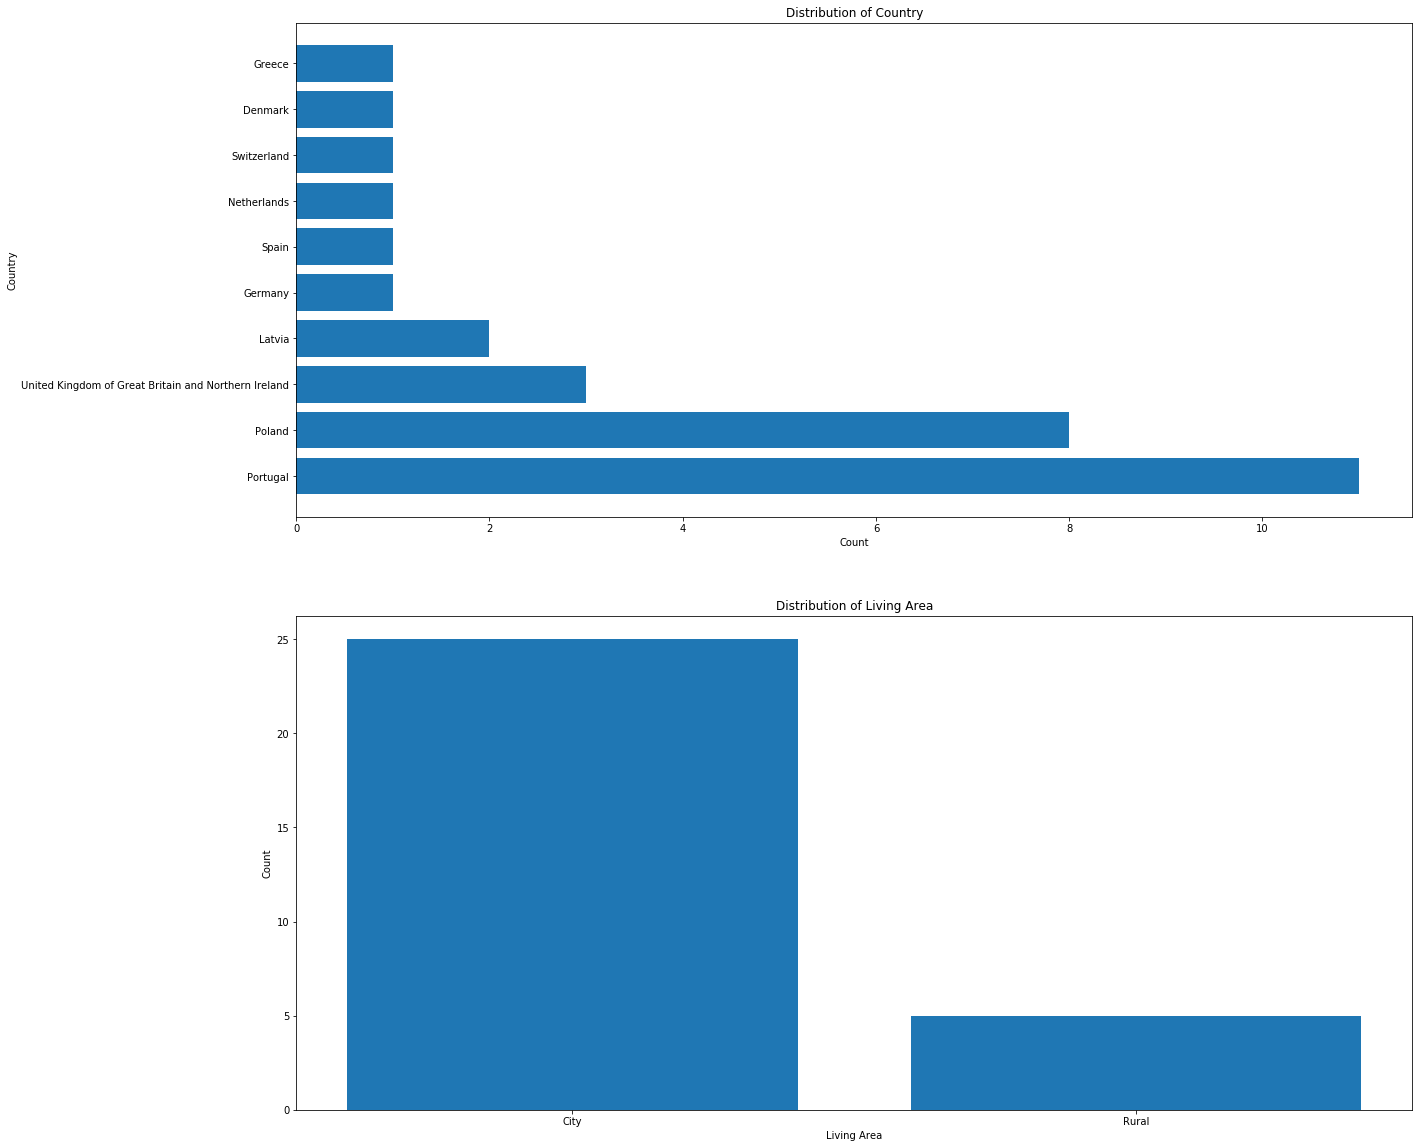

In [198]:
# Set up the figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 20))  # Adjust the figure size if needed


# Plot 1: Country Distribution
gender_counts = df['Q17'].value_counts()
axes[0].barh(gender_counts.index, gender_counts.values )
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Country')
axes[0].set_title('Distribution of Country')


# Plot 2: Living Area Distribution
age_counts = df['Q18'].value_counts()
axes[1].bar(age_counts.index, age_counts.values)
axes[1].set_xlabel('Living Area')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Living Area')


# Show the plot
plt.show()

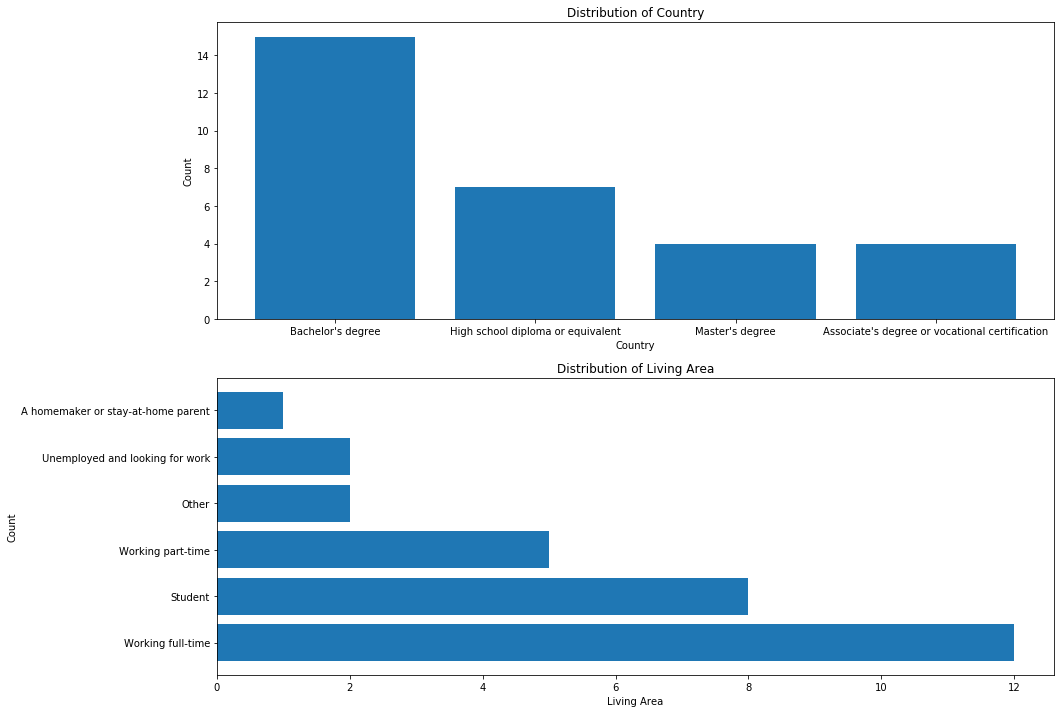

In [247]:
# Set up the figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))  # Adjust the figure size if needed


# Plot 1: Education Distribution
gender_counts = df['Q19'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values)
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Country')



# Plot 2: Employment status distrubution
age_counts = df['Q20'].value_counts()
axes[1].barh(age_counts.index, age_counts.values)
axes[1].set_xlabel('Living Area')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Living Area')


# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of transportation mode')

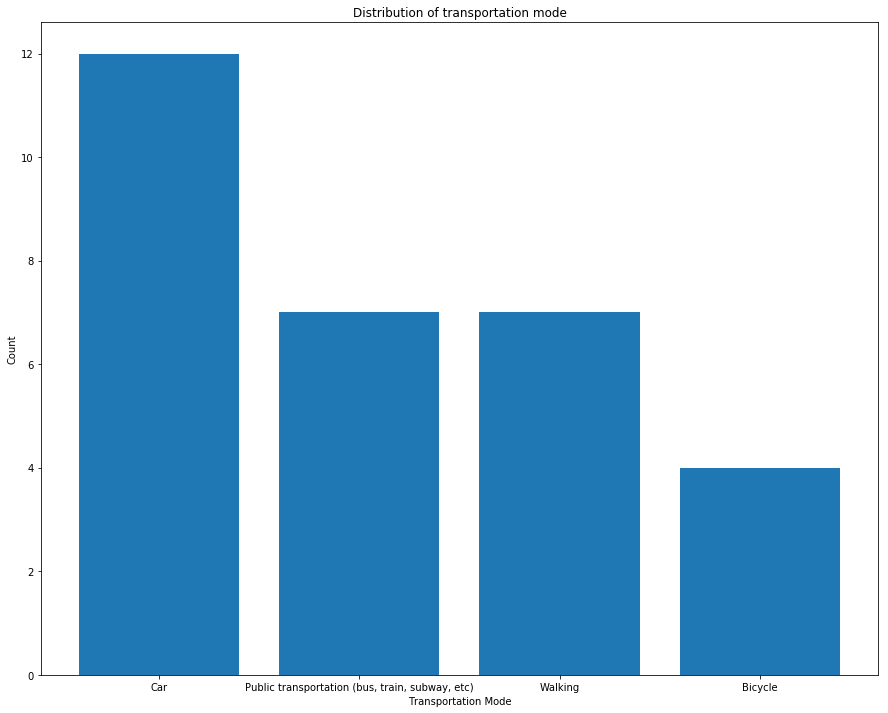

In [249]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(15, 12))  # Adjust the figure size if needed


# Plot 1: Education Distribution
gender_counts = df['Q21'].value_counts()
axes.bar(gender_counts.index, gender_counts.values)
axes.set_xlabel('Transportation Mode')
axes.set_ylabel('Count')
axes.set_title('Distribution of transportation mode')
